In [86]:
import json
import pandas as pd
from collections import Counter
from Graph_Helpers import *
import seaborn as sns
import itertools

from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA

from adjustText import adjust_text
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
from collections import Counter

In [87]:
import sys
sys.version

'3.12.3 (v3.12.3:f6650f9ad7, Apr  9 2024, 08:18:47) [Clang 13.0.0 (clang-1300.0.29.30)]'

### Visualise Indian Spice-indication mapping

In [108]:
region2spice_final = pd.read_csv("/Users/bhavikaberwal/Documents/Spice_Herbs_ML/Data/region2spice_final.csv", index_col=0)
spice2ind_final = pd.read_csv("/Users/bhavikaberwal/Documents/Spice_Herbs_ML/Data/spice2ind_final.csv", index_col=0)



In [114]:
region2indcat = pd.DataFrame(columns=count_dict_indication.keys() )

temp = {}
for k, v in indication_group_Indian_dict.items():
    temp[k]= [v]
    
temp = reverse_dict(temp) # get category to indication dictionary

for k,v in temp.items():
    region2indcat[k] = region2ind[v].sum(axis=1)#/(len(v))
    
region2indcat   

,skin_disease,infectious_disease,General symptom,mental_disease,respiratory_disease,cardiovascular_disease,gastrointestinal_disease,injury,cancer_disease,pregnancy_disease,...,neuronal_disease,poisoning,nutritional_disease,musculoskeletal_disease,othercauses,immune_disease,oral_disease,smell_taste_disease,sleep_disease,general_disease
cuisine,,,,,,,,,,,,,,,,,,,,,
Andhra,34.596154,151.173077,92.730769,24.884615,61.250000,31.173077,97.038462,12.634615,71.423077,5.096154,...,38.653846,7.192308,3.269231,32.865385,3.500000,7.480769,0.000000,1.076923,2.346154,2.384615
Bengali,28.254480,119.103943,77.297491,22.663082,50.043011,25.928315,82.096774,10.250896,64.752688,4.290323,...,29.827957,5.064516,2.802867,26.978495,2.627240,6.541219,0.021505,0.917563,1.817204,2.301075
Goan,43.410256,198.000000,115.474359,32.756410,77.205128,39.038462,123.769231,16.589744,94.794872,7.487179,...,46.820513,7.794872,3.346154,39.717949,4.102564,10.512821,0.012821,1.487179,2.884615,3.358974
Gujarati,28.442375,112.804424,76.308498,21.823050,49.172293,26.279395,79.485448,10.090803,58.824214,4.179278,...,30.961583,5.634459,2.916182,27.955763,2.697322,6.311991,0.023283,0.775320,1.982538,2.038417
Hyderabadi,47.282353,212.629412,131.170588,41.929412,86.452941,42.970588,144.658824,16.152941,111.976471,7.111765,...,51.858824,8.535294,3.700000,45.582353,4.170588,11.958824,0.011765,1.311765,3.700000,3.782353
Jain,27.073016,104.952381,71.828571,20.549206,46.679365,23.901587,77.114286,9.228571,58.368254,4.057143,...,28.657143,5.266667,2.780952,25.901587,2.469841,4.784127,0.050794,0.511111,1.666667,2.031746
Karnataka,32.528000,135.000000,84.808000,21.984000,55.968000,27.472000,88.880000,12.104000,66.792000,5.456000,...,33.832000,6.192000,3.208000,28.976000,3.080000,5.944000,0.000000,1.128000,2.088000,2.368000
Kashmiri,33.553191,150.170213,102.255319,32.765957,69.765957,31.319149,115.978723,12.021277,86.404255,5.680851,...,40.489362,6.106383,3.361702,34.404255,2.765957,9.021277,0.000000,0.787234,2.744681,3.574468
Kerala,33.992126,145.724409,89.653543,23.566929,59.039370,30.244094,92.141732,12.779528,69.110236,6.094488,...,34.937008,6.055118,3.456693,30.354331,3.220472,7.440945,0.007874,1.047244,2.259843,2.598425


In [115]:
temp['general_disease'] , temp['nephrological_disease']

(['Morning sickness', 'Lethargy', 'Trauma', 'Postmenopause', 'Hot flashes'],
 ['Gonorrhea',
  'Nephrosis',
  'Urogenitosis',
  'Dysuria',
  'Kidney stone',
  'Uti',
  'Bladder infection',
  'Pyelonephrosis',
  'Urethrosis',
  'Incontinence',
  'Stone',
  'Diuretic',
  'Gravel',
  'Strangury',
  'Anuria',
  'Bladderailment',
  'Hematuria',
  'Uremia',
  'Bladder stone',
  'High urea',
  'Proteinuria',
  'Pyelosis',
  'Oxalcrystalluria',
  'Calculosis',
  'Urolithiasis',
  'Lithuria',
  'Extrophy',
  'Ischuria',
  'Oliguria'])

In [116]:
col_colors
cat2color

{'skin_disease': (0.8167028311697733, 0.5345122109266688, 0.5750280113923723),
 'endocrine_disease': (0.8229959884997893,
  0.5377798588443925,
  0.5116846539139179),
 'eye_disease': (0.8018146927241498, 0.5534272368506118, 0.45246098679834906),
 'nutritional_disease': (0.7429581287166294,
  0.5796153285284775,
  0.45151163537788813),
 'gastrointestinal_disease': (0.6999831863097125,
  0.5962986391095079,
  0.4508760679513775),
 'blood_disease': (0.6636007146741986, 0.6090137395657735, 0.4503753158506307),
 'General symptom': (0.6287975658687338,
  0.6200811770268797,
  0.44992779333073135),
 'pregnancy_disease': (0.591388073866394,
  0.6308812383269636,
  0.4494805115141632),
 'general_disease': (0.5456867022526374,
  0.6426617146508851,
  0.4489805987976582),
 'musculoskeletal_disease ': (0.47974942417114835,
  0.6571819677589695,
  0.44834696208654984),
 'cancer_disease': (0.453450222982081, 0.6583881730009131, 0.5056639411778575),
 'ear_disease': (0.45873249941491884, 0.65349465786

In [117]:
region2indcat.sum().min()

0.2131440790118617

In [118]:
region2indcat.columns

rename_dict= {}
for col in region2indcat.columns:
    rename_dict[col] = col.replace("_disease", "").capitalize()
    
region2indcat.rename(rename_dict, axis='columns', inplace=True )
region2indcat.rename({'Smell_taste' : 'Smell & Taste', 'Othercauses': 'Other causes'}, axis='columns', inplace=True )

region2indcat.drop(columns=['General', 'Injury', 'Other causes'], inplace=True)

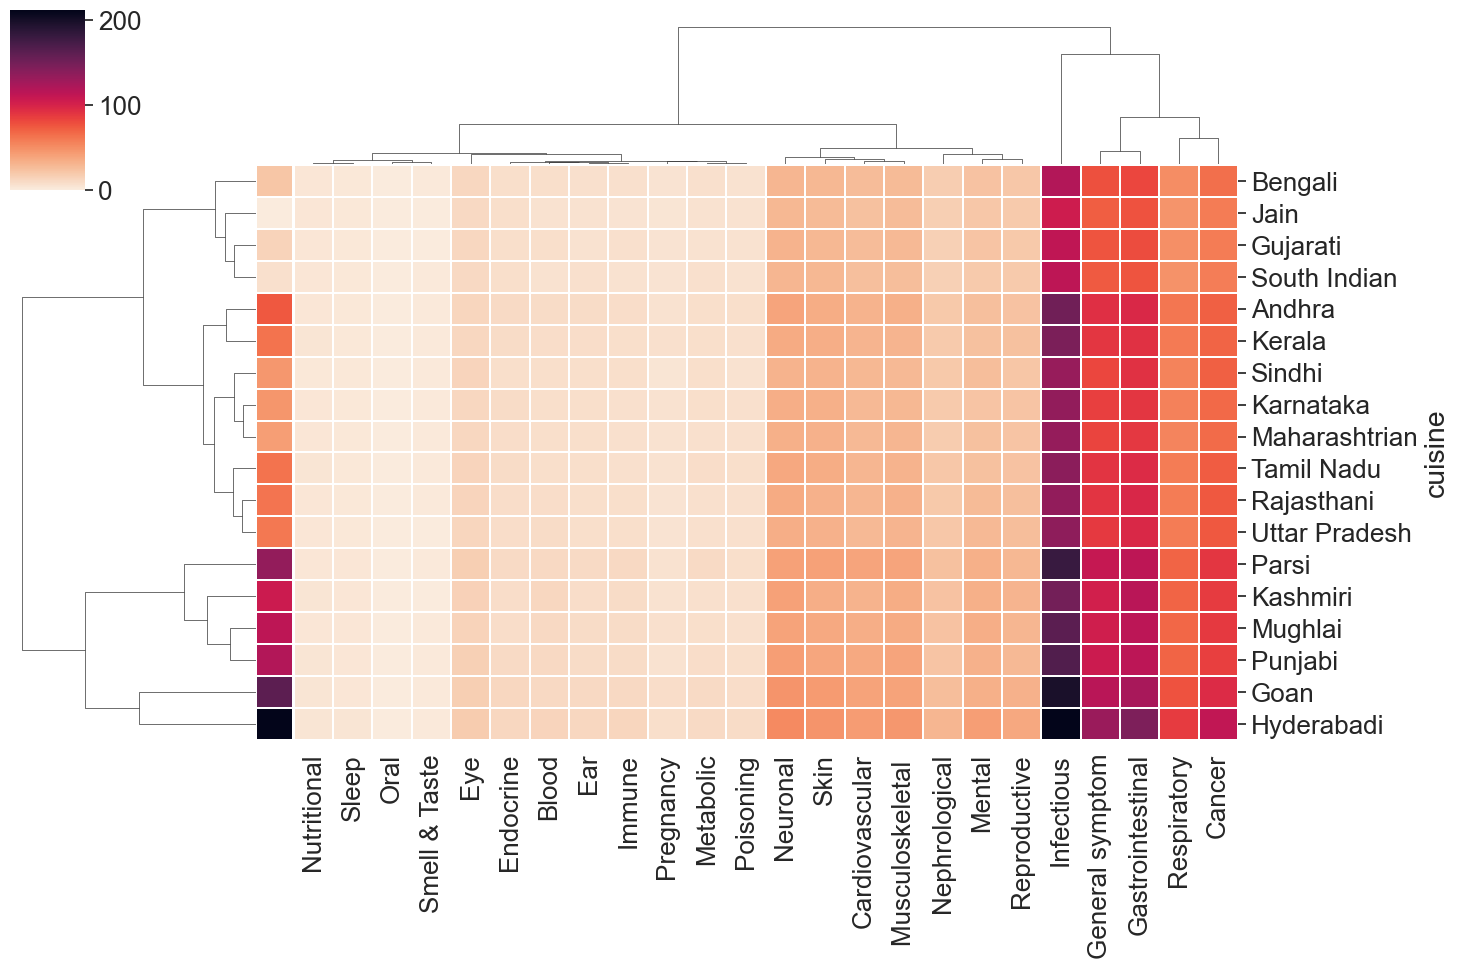

In [ ]:


def mapcolor(region2indcat):
    temp = region2indcat.sum()
    temp= (temp-temp.min())/(temp.max()-temp.min())
    col_colors = sns.cm.rocket_r(temp, len(temp)) #rocket_r  # mako
    return col_colors

#plt.figure(figsize=(5,5))
sns.set(font_scale=1.7)

sns.clustermap(region2indcat, cmap= sns.cm.rocket_r,  row_colors = mapcolor(region2indcat.T), figsize= (15,10), linewidth=0.1) #rocket_r, ,, linewidths=0.1 

plt.savefig("/Users/bhavikaberwal/Documents/Spice_Herbs_ML/Figures/Indiancuisine_diseases.png", format='png')

plt.show()